In [1]:
%load_ext autoreload
%autoreload 2

In [37]:
import numpy as np
import pandas as pd
import math
from sys import getsizeof
%matplotlib inline
import matplotlib.pyplot as plt
#import mpl_toolkits.mplot3d as Axes3d
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as FF
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['axes.axisbelow'] = True

In [3]:
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import DataFrameMaker
from mu2e.mu2eplots import mu2e_plot, mu2e_plot3d
from hallprobesim_redux import * # get configs

<IPython.core.display.Javascript object>

In [139]:
from hallprobecalib import hpc_ext_path
from hallprobecalib.hpcplots import scatter2d, scatter3d, histo, spherical_scatter3d 

# PyROOT
- Last night determined that ROOT build is configured to run with python2.
    - at some point it would be nice to change this to python3...but ROOT takes a long time to build.
- used PyROOT on /home/ckampa/Coding/mu2e_analysis/ntuples/nts.ckampa.trkanadigi.CeEndpoint.001002_00000000.root
    - saved only branches with 'de' (downstream electron) or 'evt' (event) tags from TrkAnaNeg tree.
    - saved pandas DataFrame as pkl: /home/ckampa/Coding/Mu2E_Extras/root/ce_OLD.pkl (named OLD in anticipation of new ce file)
- tested some Plotly plotting of x,y,z at various points in lifetime (demcgen, demcent, demcmid, demcxit)
    - sample 500 from dataset and plot in greyscale
    - sample 1 from small dataset and plot in color, slightly larger

In [5]:
# import data (first prepped in python 2)
df = pd.read_pickle(mu2e_ext_path+'root/ce_OLD.pkl')
# select good events only
df = df[df['de._status'] != -1000]

In [6]:
df_sam = df.sample(500)

In [7]:
# plotting configs
units = ['mm','mm','mm','mm',]
colors = ['Greys','Greys','Greys','Greys','Viridis',]

In [8]:
# naming for columns
x_gen = 'demcgen_x'
y_gen = 'demcgen_y'
z_gen = 'demcgen_z'
x_ent = 'demcent_x'
y_ent = 'demcent_y'
z_ent = 'demcent_z'
x_mid = 'demcmid_x'
y_mid = 'demcmid_y'
z_mid = 'demcmid_z'
x_xit = 'demcxit_x'
y_xit = 'demcxit_y'
z_xit = 'demcxit_z'

In [182]:
def gen_event(df, n=1):
    df = df.sample(n)
    xs = df[[x_gen,x_ent,x_mid,x_xit,]].transpose().values.flatten()
    ys = df[[y_gen,y_ent,y_mid,y_xit,]].transpose().values.flatten()
    zs = df[[z_gen,z_ent,z_mid,z_xit,]].transpose().values.flatten()
    sub = [df['evtinfo._subrunid'].values[0]]*4
    evt = [df['evtinfo._eventid'].values[0]]*4
    df = pd.DataFrame()
    df['X'] = pd.Series(xs)
    df['Y'] = pd.Series(ys)
    df['Z'] = pd.Series(zs)
    df['SUBID'] = pd.Series(sub)
    df['EVTID'] = pd.Series(evt)
    return df

In [168]:
# a way to calculate min and max of passed in lists. add flag for sharing colorscale?
#mi = min(np.concatenate([z.values for z in Z]))
#ma = max(np.concatenate([z.values for z in Z]))

In [19]:
min_scale = [df_sam.demcgen_z.min()-1000]*4
max_scale = [df_sam.demcxit_z.max()]*4

In [20]:
max_scale

[1639.1, 1639.1, 1639.1, 1639.1]

In [21]:
# greyscale plot
X = [df_sam[x_gen],df_sam[x_ent],df_sam[x_mid],df_sam[x_xit],]
Y = [df_sam[y_gen],df_sam[y_ent],df_sam[y_mid],df_sam[y_xit],]
Z = [df_sam[z_gen],df_sam[z_ent],df_sam[z_mid],df_sam[z_xit],]
scatter3d(X,Y,Z,units_list=units[:-1], colors_list=colors[:-1], min_color_list=min_scale,max_color_list=max_scale,opacity_list=list(0.8*np.ones(4)), size_list = list(1.5*np.ones(4)), title='Conversion Electron MC:', reverse_scale=True,inline=True)

In [204]:
# pick random events and plot!
def gen_electron_plot(linear_trace=True,inline=True,filename=hpc_ext_path+'plots/root/ce_scatter3d_DEFAULT'):
    gen = gen_event(df_sam)
    colors = 4*['Greys']+['Viridis',]
    #colors = 4*[[1.,'rgb(100,100,100)']]+['Viridis',]
    #colorbars = [True,False,False,False,True]
    colorbars = [False,False,False,False,True]
    X = [df_sam[x_gen],df_sam[x_ent],df_sam[x_mid],df_sam[x_xit],gen['X'],]
    Y = [df_sam[y_gen],df_sam[y_ent],df_sam[y_mid],df_sam[y_xit],gen['Y'],]
    Z = [df_sam[z_gen],df_sam[z_ent],df_sam[z_mid],df_sam[z_xit],gen['Z'],]
    #min_scale = [df_sam.demcgen_z.min()-1000]*4+[gen['Z'].min()]
    #max_scale = [df_sam.demcxit_z.max()]*4+[gen['Z'].max()]
    #min_scale = [-10000]*4+[gen['Z'].min()]
    #max_scale = [-10000]*4+[gen['Z'].max()]
    min_scale = [-10000]*4+[df_sam.demcgen_z.min()]
    max_scale = [-10000]*4+[df_sam.demcxit_z.max()]
    title = f"Conversion e- MC, subrun{gen['SUBID'].values[0]}, event{gen['EVTID'].values[0]}:"
    fig = scatter3d(X,Y,Z,units_list=units, colors_list=colors, colorbars_list = colorbars, min_color_list=min_scale, max_color_list=max_scale, opacity_list=list(0.4*np.ones(4))+[1], size_list = list(1.5*np.ones(4))+[4], title=title,reverse_scale=True, inline=inline,plot = False)
    camera = dict(
        up=dict(x=0, y=1, z=0),
        center=dict(x=0, y=0, z=0.),
        eye=dict(x=-1.8, y=0.2, z=-0.1)
    )
    fig.layout.dragmode = 'orbit'
    fig.layout.scene.camera = camera
    if linear_trace == True:
        fig.add_scatter3d(x=gen['X'],y=gen['Y'],z=gen['Z'],mode='lines')
        if inline == True:
            iplot(fig,filename=hpc_ext_path +'root/'+filename)
        else:
            plot(fig,filename=filename)
    return fig,gen#filename=filename)

In [205]:
fig,gen = gen_electron_plot(inline=True)

In [206]:
for i in range(10):
    fig,gen = gen_electron_plot(inline=False,filename=f'plots/root/ce_lineartrace_scatter3d_{i}')

/home/ckampa/anaconda3/envs/Mu2E/lib/python3.7/site-packages/plotly/offline/offline.py:608: UserWarning:

Your filename `ce_lineartrace_scatter3d_0` didn't end with .html. Adding .html to the end of your file.

/home/ckampa/anaconda3/envs/Mu2E/lib/python3.7/site-packages/plotly/offline/offline.py:608: UserWarning:

Your filename `ce_lineartrace_scatter3d_1` didn't end with .html. Adding .html to the end of your file.

/home/ckampa/anaconda3/envs/Mu2E/lib/python3.7/site-packages/plotly/offline/offline.py:608: UserWarning:

Your filename `ce_lineartrace_scatter3d_2` didn't end with .html. Adding .html to the end of your file.

/home/ckampa/anaconda3/envs/Mu2E/lib/python3.7/site-packages/plotly/offline/offline.py:608: UserWarning:

Your filename `ce_lineartrace_scatter3d_3` didn't end with .html. Adding .html to the end of your file.

/home/ckampa/anaconda3/envs/Mu2E/lib/python3.7/site-packages/plotly/offline/offline.py:608: UserWarning:

Your filename `ce_lineartrace_scatter3d_4` didn't 

In [156]:
# maybe later use this to show vector arrows on track velocity...
fig.add_cone(
    x=[0], y=[0], z=[-3500],
    u=[0], v=[0], w=[50])

Cone({
    'u': [0], 'uid': '8b221d0a-7a4f-45f7-ba0a-0ac984a9def4', 'v': [0], 'w': [50], 'x': [0], 'y': [0], 'z': [-3500]
})

In [157]:
plot(fig)

'file:///home/ckampa/Coding/Mu2E/scripts/ColeTests/temp-plot.html'

# A few quick hists
- Quite sure I will need to rerun Offline with a better module for collecting track trajectories in ntuples, but I want to take one last shot at checking out what info I have

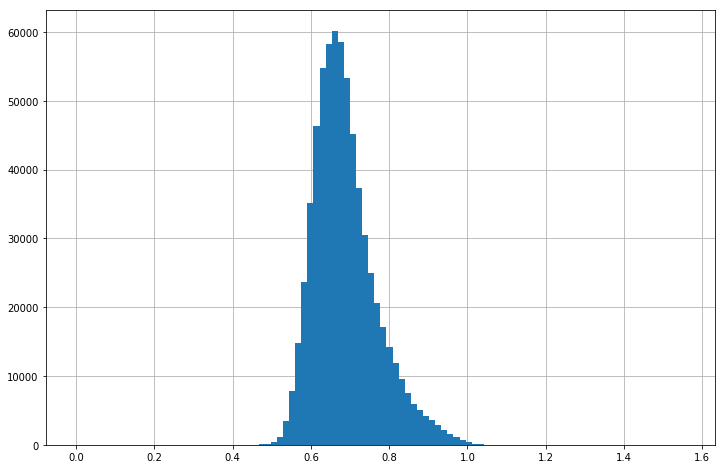

In [222]:
#np.arctan(df['demcgen_td']).hist(bins=100)
ax = np.arctan(df['demcxit_td']).hist(bins=100,log=False)#,range=[0,5])

In [220]:
histo(np.arctan(df['demcmid_td']),bins=100,inline=False,)

In [ ]:
df['pt'] = pd.Series(np.arctan(df['demcxit_td'])